<a href="https://colab.research.google.com/github/ruus77/Python/blob/main/matching%20strings%20using%20Levenshtein%20distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from pathlib import Path
import zipfile

In [2]:
from google.colab import files
files.upload()

os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/kaggle.json

!chmod 600 /root/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [3]:
!kaggle datasets download -d msrhossain/2018-inc-5000-companies-list

Dataset URL: https://www.kaggle.com/datasets/msrhossain/2018-inc-5000-companies-list
License(s): unknown
2018-inc-5000-companies-list.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!kaggle datasets download -d mysarahmadbhat/inc-5000-companies

Dataset URL: https://www.kaggle.com/datasets/mysarahmadbhat/inc-5000-companies
License(s): CC0-1.0
inc-5000-companies.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
with zipfile.ZipFile("/content/2018-inc-5000-companies-list.zip", "r") as zip_ref:
  zip_ref.extractall("/content/2018-inc-5000-companies-list")

In [6]:
with zipfile.ZipFile("/content/2018-inc-5000-companies-list.zip", "r") as zip_ref:
  zip_ref.extractall("/content/2018-inc-5000-companies-list")

In [7]:
with zipfile.ZipFile("/content/inc-5000-companies.zip", "r") as zip_ref:
  zip_ref.extractall("/content/inc-5000-companies")


In [8]:
!pip install thefuzz

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from thefuzz import fuzz

In [10]:
df1 = pd.read_csv("/content/inc-5000-companies/INC 5000 Companies 2019.csv")
df2 = pd.read_excel("/content/2018-inc-5000-companies-list/inc5000-2018.xlsx")

In [11]:
df2 = df2['COMPANY NAME']

In [12]:
df1 = df1["name"]

In [13]:
df1.head()

,name
0,Freestar
1,FreightWise
2,Cece's Veggie Co.
3,LadyBoss
4,Perpay


In [14]:
df2.head()

,COMPANY NAME
0,SwanLeap
1,PopSockets
2,Home Chef
3,Velocity Global
4,DEPCOM Power


In [15]:
df1.shape, df2.shape

((5012,), (5000,))

In [16]:
df = pd.DataFrame(itertools.product(df2.values, df1.values), columns=["INC 2018", "INC 2019"])
df.shape

(25060000, 2)

In [17]:
df.tail()

,INC 2018,INC 2019
25059995,Pedigree Technologies,Village Plumbing & Air
25059996,Pedigree Technologies,Real Restoration Group
25059997,Pedigree Technologies,Naval Systems
25059998,Pedigree Technologies,HNM Systems
25059999,Pedigree Technologies,Vivayic


In [18]:
df['INC 2018'] = df['INC 2018'].astype("string")
df['INC 2019'] = df['INC 2019'].astype("string")
df['INC 2018'].dtype, df["INC 2019"].dtype

(string[python], string[python])

In [23]:
n = len(df)

df_p1 = df.iloc[:n//2]
df_p2 = df.iloc[n//2:]
df_p1.shape, df_p2.shape

((12530000, 2), (12530000, 2))

In [22]:
score_p1 = [fuzz.partial_ratio(c1, c2) for c1, c2 in df_p1.values]
score_p1[:10]

[36, 22, 20, 40, 44, 50, 36, 31, 38, 0]

In [24]:
score_p2 = [fuzz.partial_ratio(c1, c2) for c1, c2 in df_p2.values]
score_p2[:10]

[17, 33, 24, 22, 40, 18, 17, 21, 43, 0]

In [28]:
score = score_p1 + score_p2
len(score)

25060000

In [30]:
df["Ratio Score"] = score
df.head()

,INC 2018,INC 2019,Ratio Score
0,SwanLeap,Freestar,36
1,SwanLeap,FreightWise,22
2,SwanLeap,Cece's Veggie Co.,20
3,SwanLeap,LadyBoss,40
4,SwanLeap,Perpay,44


<Axes: >

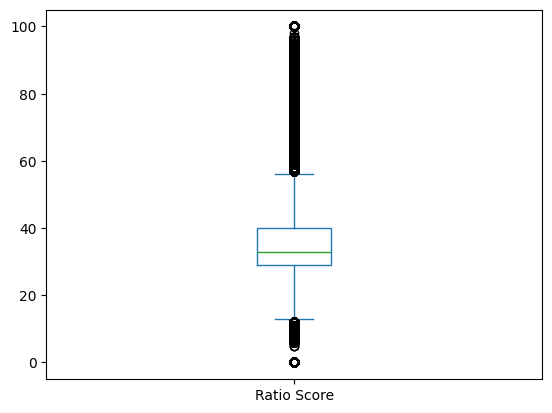

In [62]:
df.plot(y="Ratio Score", kind="box")

<Axes: >

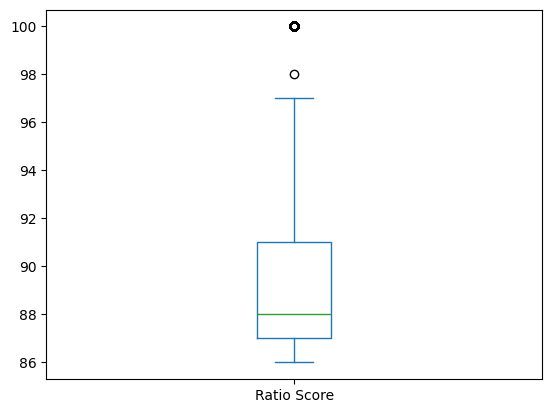

In [44]:
score_85 = df.query("`Ratio Score` > 85")
score_85.plot(y="Ratio Score", kind="box")

<Axes: ylabel='Frequency'>

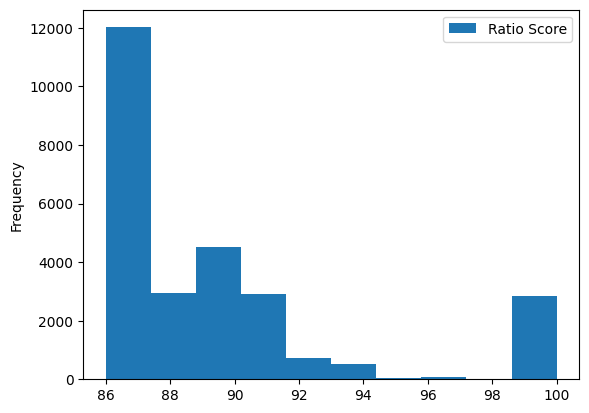

In [45]:
score_85.plot(y="Ratio Score", kind="hist")

In [61]:
df_prepared = df.loc[df["Ratio Score"] > 97].sort_values(by="Ratio Score", ascending=True)
df_prepared.head()

,INC 2018,INC 2019,Ratio Score
6180930,College Hunks Hauling Junk and Moving (West Ch...,College Hunks Hauling Junk and Moving (West Ch...,98
24542292,New Law Business Model,New Law Business Model,100
24558386,Advanced Electronic Designs,Advanced Electronic Designs,100
24568372,Kinetix,Kinetix,100
24580832,The Partners Group,Legalpeople/The Partners Group,100
